# Old homework (scroll down for #11)

In [ ]:
N = 6
f0 = [0.17, 0.17, 0.17, 0.17, 0.14, 0.18]
f1 = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
f02 = [[f0[i] * f0[j] for j in range(N)] for i in range(N)]
f12 = [[f1[i] * f1[j] for j in range(N)] for i in range(N)]
f12overf02 = [[f12[r][c] / f02[r][c] for c in range(N)] for r in range(N)]
f12overf02flat = [item for sublist in f12overf02 for item in sublist]
values = sorted(list(set(f12overf02flat)))

In [6]:
values

[0.8573388203017832,
 0.9077705156136527,
 0.9611687812379851,
 1.1022927689594355,
 1.1671335200746962,
 1.4172335600907027]

In [32]:
print('k, alpha')
for k in values:
    mask = [[v > k for v in r] for r in f12overf02]
    probs = [[f02[r][c] * mask[r][c] for c in range(N)] for r in range(N)]
    alpha = sum(map(sum, probs))
    print('{:.2} {:.4}'.format(k, alpha))
    if alpha > 0 and alpha < .02:
        print('The criterion is f1 / f2 > {:.4} for the level {:.4}'.format(k, alpha))
        for r in mask: print([int(v) for v in r])
print('As we can see in the table above, the first-order error will only happen if we roll two 5.')

k, alpha
0.86 0.9676
0.91 0.7228
0.96 0.2604
1.1 0.21
1.2 0.0196
The criterion is f1 / f2 > 1.167 for the level 0.0196
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0]
1.4 0.0
As we can see in the table above, the first-order error will only happen if we roll two 5.


# Homework 11
## Distribution modelling
### https://wiki.compscicenter.ru/images/0/0d/MathStat-2018-12-05.pdf

In [11]:
import random
import matplotlib.pyplot as plt

from math import exp, log

%matplotlib inline

In [18]:
a = 1
c = 1 / 2 / (exp(-a) + a)
n = 100

def custom_random(a = a):    
    y = random.random()
    x1 = log(y) 
    x2 = y - exp(-a) - a
    x3 = -log(2 * exp(-a) + 2 * a - y)
    if x1 < -a: return x1
    if -a <= x2 <= a: return x2
    return x3

## Expected density function

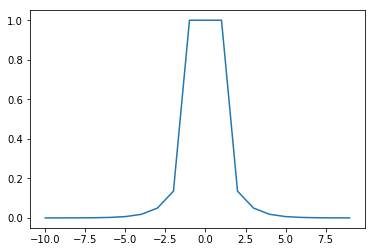

In [24]:
def f(x, a = a):
    return exp(-abs(x)) if abs(x) > a else 1
inputs = list(range(-10, 10))
outputs0 = [f(x) for x in inputs]
plt.plot(inputs, outputs)

## Actual distribution function

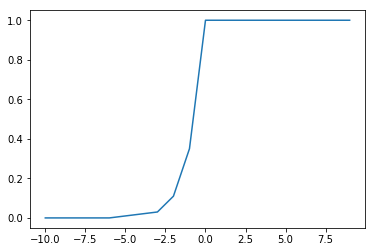

In [29]:
values = [custom_random() for _ in range(n)]
values.sort()
outputs2 = [len(list(filter(lambda v: v <= x, values))) / 100 for x in inputs]
plt.plot(inputs, outputs2)
plt.show()